{'alpha': 1}
-0.6404729772632309
0.02051383384856753


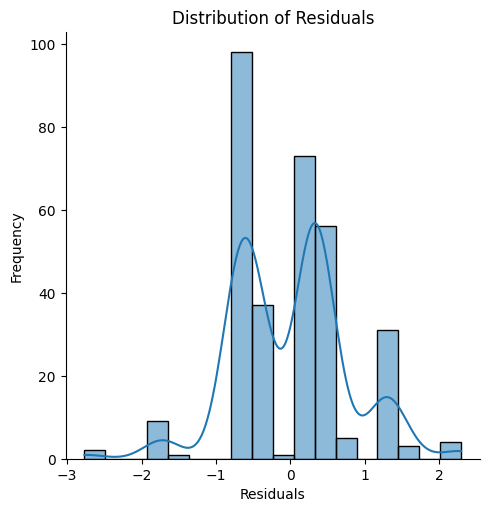

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red_wine = pd.read_csv(url_red, sep=";")

x = red_wine.iloc[:, :-1]
y = red_wine.iloc[:, -1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lass = Lasso()
parameter = {'alpha': [1, 5, 10, 20, 25]}
lasso_train = GridSearchCV(lass, parameter, scoring='neg_mean_squared_error', cv=5)
lasso_train.fit(x_train, y_train)

# Output the best parameters and score
print(lasso_train.best_params_)
print(lasso_train.best_score_)

# Use the best model found by GridSearchCV
best_lasso = lasso_train.best_estimator_

# Now make predictions
y_pred = best_lasso.predict(x_test)



from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
residuals = y_test - y_pred
sns.displot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.show()
